# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

In this lab you will: 

- Use a log transformation to minimize non-stationarity 
- Use rolling means to reduce non-stationarity 
- Use differencing to reduce non-stationarity 
- Use rolling statistics as a check for stationarity 
- Create visualizations of transformed time series as a visual aid to determine if stationarity has been achieved 
- Use the Dickey-Fuller test and conclude whether or not a dataset is exhibiting stationarity 


## Detrending the Air passenger data 

In this lab you will work with the air passenger dataset available in `'passengers.csv'`. First, run the following cell to import the necessary libraries. 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

- Import the `'passengers.csv'` dataset 
- Change the data type of the `'Month'` column to a proper date format 
- Set the `'Month'` column as the index of the DataFrame 
- Print the first five rows of the dataset 

In [2]:
# Import 'passengers.csv' dataset
data = pd.read_csv('passengers.csv')

# Change the data type of the 'Month' column
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)

# Set the 'Month' column as the index
ts = data.set_index('Month')

# Print the first five rows
ts.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
ts.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Plot this time series. 

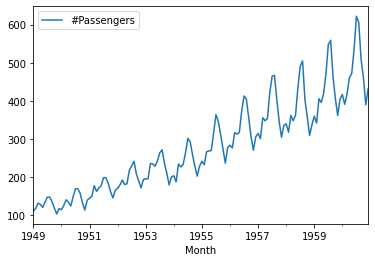

In [4]:
# Plot the time series
ts.plot();

## Create a stationarity check

Your next task is to use the code from previous labs to create a function `stationarity_check()` that takes in a time series and performs stationarity checks including rolling statistics and the Dickey-Fuller test. 

We want the output of the function to: 

- Plot the original time series along with the rolling mean and rolling standard deviation (use a window of 8) in one plot 
- Output the results of the Dickey-Fuller test 

In [57]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs
from statsmodels.tsa.stattools import adfuller

def stationarity_check(time_series, window_size):
    '''doc string'''
    # compute rolling stats
    roll_mean = time_series.rolling(window=window_size, center=False).mean()
    roll_std = time_series.rolling(window=window_size, center=False).std()
    # plot
    fig, ax = plt.subplots()
    time_series.plot(ax=ax)
    roll_mean.plot(ax=ax, c='r')
    roll_std.plot(ax=ax, c='k')
    ax.legend(['No. of Passengers', 'Rolling Mean', 'Rolling Standard Deviation']);
    ax.set_title(f'Window Size = {window_size}')
    
    # output Dickey-Fuller test results
    if adfuller(time_series)[1] < 0.01:
        print('Stationary! At 99% confidence level.')
    elif adfuller(time_series)[1] < 0.05:
        print('Stationary! At 95% confidence level.')
    else:
        print('Not stationary yet.')

Use your newly created function on the `ts` timeseries. 

Not stationary yet.


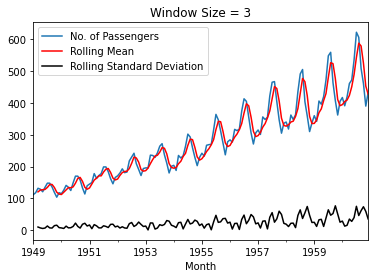

In [58]:
# Code here
stationarity_check(ts, window_size=3)

## Perform a log and square root transform

Plot a log transform of the original time series (`ts`). 

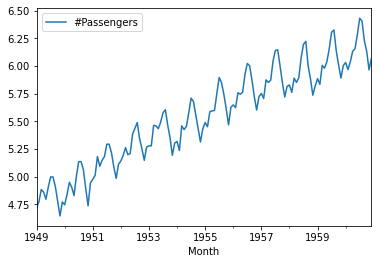

In [59]:
# Plot a log transform
np.log(ts).plot();

Taking the logarithm of the number of passengers changes the scale, but does little else. (Though actually, it does seem to reduce the heteroscedasticity as well.)

Plot a square root  transform of the original time series (`ts`). 

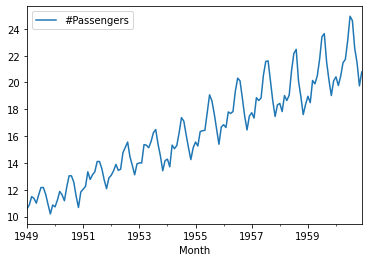

In [21]:
# Plot a square root transform
np.sqrt(ts).plot();

Going forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

<Figure size 792x504 with 0 Axes>

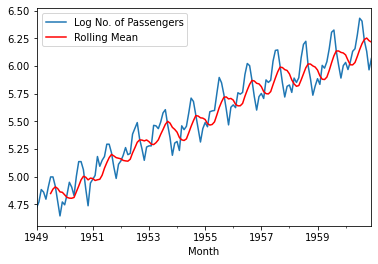

In [28]:
# your code here
roll_mean = np.log(ts).rolling(window=7).mean()
fig = plt.figure(figsize=(11,7)) 
np.log(ts).plot()
ax = plt.gca()
roll_mean.plot(ax=ax, color='r')
ax.legend(['Log No. of Passengers', 'Rolling Mean']);

Now, subtract this rolling mean from the log transformed time series, and look at the 10 first elements of the result.  

In [29]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean = np.log(ts) - roll_mean

# Print the first 10 rows
data_minus_roll_mean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


Drop the missing values from this time series. 

In [31]:
# Drop the missing values
data_minus_roll_mean.dropna(inplace=True)

Plot this time series now. 

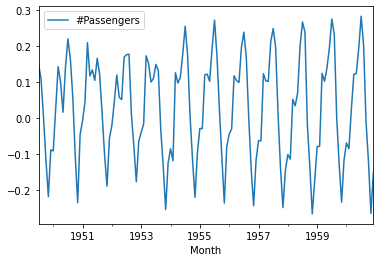

In [32]:
# Plot the result
data_minus_roll_mean.plot();

Finally, use your function `check_stationarity()` to see if this series is stationary!

Not stationary yet.


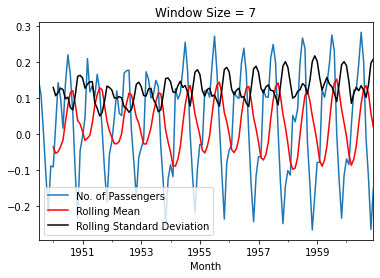

In [60]:
# Your code here
stationarity_check(data_minus_roll_mean, window_size=7)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


The time series is still not stationary after subtracting the rolling mean from the log-transformed values. It looks like there is still some heteroscedasticity.

## Subtracting the weighted rolling mean

Repeat all the above steps to calculate the exponential *weighted* rolling mean with a halflife of 4. Start from the log-transformed data again. Compare the Dickey-Fuller test results. What do you conclude?

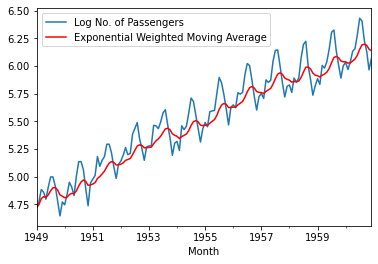

In [40]:
# Calculate Weighted Moving Average of log transformed data
exp_roll_mean = np.log(ts).ewm(halflife=4).mean()

# Plot the original data with exp weighted average
fig, ax = plt.subplots()
np.log(ts).plot(ax=ax)
exp_roll_mean.plot(ax=ax, c='r')
ax.legend(['Log No. of Passengers', 'Exponential Weighted Moving Average']);

- Subtract this exponential weighted rolling mean from the log transformed data  
- Print the resulting time series 

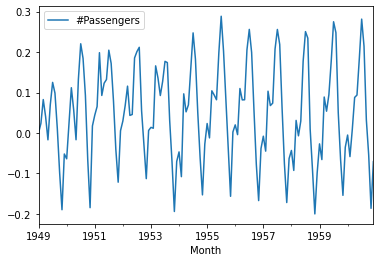

In [41]:
# Subtract the exponential weighted rolling mean from the original data 
data_minus_exp_roll_mean = np.log(ts) - exp_roll_mean

# Plot the time series
data_minus_exp_roll_mean.plot();

Check for stationarity of `data_minus_exp_roll_mean` using your function. 

Stationary! At 95% confidence level.


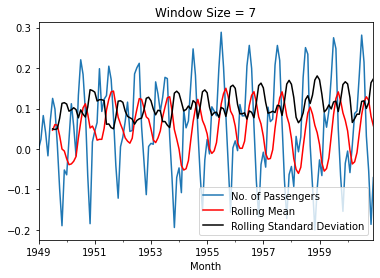

In [61]:
# Do a stationarity check
stationarity_check(data_minus_exp_roll_mean, window_size=7)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


We can conclude that the data is stationary at a 95% confidence level. It doesn't *look* like the mean is constant, but the scale of the y-axis is pretty small, so that could just be random noise.

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, drop the missing values, plot the resulting time series, and then run the `stationarity check()` again.

In [47]:
# Difference your data
data_diff = data_minus_exp_roll_mean.diff(periods=1)

# Drop the missing values
data_diff.dropna(inplace=True)

# Check out the first few rows
data_diff.head(15)

,#Passengers
Month,
1949-02-01,0.023838
1949-03-01,0.058760
1949-04-01,-0.041957
1949-05-01,-0.057603
1949-06-01,0.086713
1949-07-01,0.055328
1949-08-01,-0.026534
1949-09-01,-0.087375
1949-10-01,-0.109883


Plot the resulting differenced time series. 

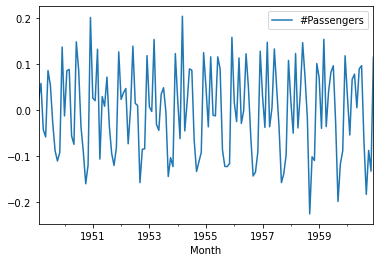

In [48]:
# Plot your differenced time series
data_diff.plot();

Stationary! At 95% confidence level.


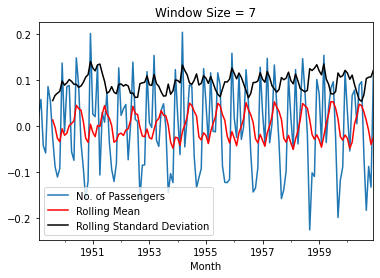

In [62]:
# Perform the stationarity check
stationarity_check(data_diff, window_size=7)

### Your conclusion

First of all, the window size for computing the rolling mean and rolling standard deviation makes a big difference in the look of the plot. I will continue using window_size = 7 since that is what I have been using throughout my analysis.

Second, the mean does appear visually to be distributed normally about 0 now with a small standard deviation, and the variance also appears to be distributed normally about a constant (0.1) so I think we have some visual confirmation to support the results of the Dickey Fuller test (that our series is now stationary!) At least, at a 95% confidence level.

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means, and differencing.